#### National Rail UK Train Rides ####

-----

***Project Overview.***

This project analyses passenger rail trends using the **National Rail UK Train Rides dataset** (January to April). The objective is to identify patterns in travel behaviour, with a focus on train on-time performance and contributing factors, as well as traveller activities.

***Goals.***
- Asses train on-time performance and identify factors contributing to delays.
- Analyse revenue across different ticket classes and types.
- Evaluate trends in customer satisfaction.

***Business Tasks.***
- What routes are the most popular?
- How does revenue vary by ticket type & class?
- What is the on-time performance & what are the main contributing factors?
- What are the railcards used for?
- What impact have contributing factors had on departure stations and across the quarter of the year?

**Approach.**
- Data collection, Cleaning, & Preparation.
- Exploratory data analysis and insights(e.g. using pivot tables).
- Visualision & Comparative analysis. 

-----

**Importing data**

In [12]:
# importing libraries.

import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [13]:
# pulling data.

railway = pd.read_csv('/Users/glen/Desktop/project resources/UK+Train+Rides/railway.csv')

In [14]:
# data overview.

railway.head(6)

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,NaN,No
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,NaN,No
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,NaN,No
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,NaN,No
5,4e1dcd88-3d95-44ef-99fa,2023-12-30,07:56:06,Online,Credit Card,NaN,Standard,Advance,35,London Kings Cross,York,2024-01-01,06:15:00,08:05:00,08:05:00,On Time,NaN,No


In [15]:
railway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction ID       31653 non-null  object
 1   Date of Purchase     31653 non-null  object
 2   Time of Purchase     31653 non-null  object
 3   Purchase Type        31653 non-null  object
 4   Payment Method       31653 non-null  object
 5   Railcard             10735 non-null  object
 6   Ticket Class         31653 non-null  object
 7   Ticket Type          31653 non-null  object
 8   Price                31653 non-null  int64 
 9   Departure Station    31653 non-null  object
 10  Arrival Destination  31653 non-null  object
 11  Date of Journey      31653 non-null  object
 12  Departure Time       31653 non-null  object
 13  Arrival Time         31653 non-null  object
 14  Actual Arrival Time  29773 non-null  object
 15  Journey Status       31653 non-null  object
 16  Reas

In [16]:
railway.dtypes

Transaction ID         object
Date of Purchase       object
Time of Purchase       object
Purchase Type          object
Payment Method         object
Railcard               object
Ticket Class           object
Ticket Type            object
Price                   int64
Departure Station      object
Arrival Destination    object
Date of Journey        object
Departure Time         object
Arrival Time           object
Actual Arrival Time    object
Journey Status         object
Reason for Delay       object
Refund Request         object
dtype: object

There are a total of **18 columns** with **31653 rows** within this dataset. This includes; transactions(time and date of the purchase), payment method, tickets(type and classes), journey times, etc. This dataset consists of different data types for each column, such as int and object(strings, date, time, etc). 
This dataset holds travel insights from January to April 2024.

---

**Data Wrangling**

This process would includes cleaning and manipulating data in preparation for analysis and extracting insights.

(a).**Cleaning data**

In [22]:
# checking for null values.

railway.isnull().sum()

Transaction ID             0
Date of Purchase           0
Time of Purchase           0
Purchase Type              0
Payment Method             0
Railcard               20918
Ticket Class               0
Ticket Type                0
Price                      0
Departure Station          0
Arrival Destination        0
Date of Journey            0
Departure Time             0
Arrival Time               0
Actual Arrival Time     1880
Journey Status             0
Reason for Delay       27481
Refund Request             0
dtype: int64

There are **3 columns** that consist of null values: **railcard, actual arrival time**, and **reason for delay**. However, these null values don't impact the dataset. For instance, the null values in **actual arrival time** are due to some trains being cancelled.

In [24]:
railway.head(5)

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,NaN,No
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,NaN,No
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,NaN,No
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,NaN,No


In [25]:
# checking for duplicate values.

railway.duplicated().sum()

0

There isn't any duplicated values within the dataset.

----

(b).**Data Manipulation**

This part would consist of manipulating the dataset in order to extract insights accurately within the dataset.

In [30]:
# sorting out the null values within.

railway['Reason for Delay'] = railway['Reason for Delay'].fillna('None')
railway['Railcard'] = railway['Railcard'].fillna('None')
railway['Actual Arrival Time'] = railway['Actual Arrival Time'].fillna('00:00:00')

In [31]:
railway.head(6)

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,None,No
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,None,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,None,No
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,None,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,None,No
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,None,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,None,No
5,4e1dcd88-3d95-44ef-99fa,2023-12-30,07:56:06,Online,Credit Card,None,Standard,Advance,35,London Kings Cross,York,2024-01-01,06:15:00,08:05:00,08:05:00,On Time,None,No


In [32]:
railway.isnull().sum()

Transaction ID         0
Date of Purchase       0
Time of Purchase       0
Purchase Type          0
Payment Method         0
Railcard               0
Ticket Class           0
Ticket Type            0
Price                  0
Departure Station      0
Arrival Destination    0
Date of Journey        0
Departure Time         0
Arrival Time           0
Actual Arrival Time    0
Journey Status         0
Reason for Delay       0
Refund Request         0
dtype: int64

In [33]:
# changing data types from object(date of journey) to datetime. to extract the month 

#railway['Date of Journey'] = pd.to_datetime(railway['Date of Journey'], format='%d/%m/%Y')

railway['Date of Journey'] = pd.to_datetime(railway['Date of Journey'])

In [34]:
railway.dtypes

Transaction ID                 object
Date of Purchase               object
Time of Purchase               object
Purchase Type                  object
Payment Method                 object
Railcard                       object
Ticket Class                   object
Ticket Type                    object
Price                           int64
Departure Station              object
Arrival Destination            object
Date of Journey        datetime64[ns]
Departure Time                 object
Arrival Time                   object
Actual Arrival Time            object
Journey Status                 object
Reason for Delay               object
Refund Request                 object
dtype: object

In [35]:
railway.head(2)

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,None,No
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No


In [36]:
railway['Month'] = railway['Date of Journey'].dt.month_name()

In [37]:
railway.head(1)

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request,Month
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,None,No,January


There were a few errors within the 'reason of delay' due to grammar errors. Which would be changed for data accuracy. 

In [39]:
railway['Reason for Delay'] = railway['Reason for Delay'].replace(
    ({'Signal failure' : 'Signal Failure',
      'Weather' : 'Weather Conditions',
      'Staffing' : 'Staff Shortage'})
                                                                 )

----

**Analysing Data**

Using pivot tables to extract and insight within the dataset based on the business's objectives.

----

`(i)` How many customers use railcards and what type of railcards are used?

In [45]:
pd.pivot_table(railway,
               index = 'Railcard',
               values = 'Transaction ID',
               aggfunc = 'count',
               margins = True,
               margins_name = 'Railcard Type & Total'
              )

,Transaction ID
Railcard,
Adult,4846
Disabled,3089
None,20918
Senior,2800
Railcard Type & Total,31653


This pivot table shows 3 other railcards. Out of the 3, the **adult railcard** was mostly used, with a total of **4846**, and the least used was the **senior railcard**, with **2800**. However, a huge number **20918** of travellers don't use railcards.

`(ii)` How does the revenue vary by ticket types and classes.

In [48]:
pd.pivot_table(railway,
               index = ['Ticket Type', 'Ticket Class'],
               values = ['Transaction ID', 'Price'],
               aggfunc = {'Transaction ID': 'count',
                          'Price': 'sum'
                         },
               margins = True,
               margins_name = 'Total'
              )

Price  Transaction ID
Ticket Type Ticket Class                        
Advance     First Class    66886            1764
            Standard      242388           15797
Anytime     First Class    37841             490
            Standard      171468            4850
Off-Peak    First Class    44672             804
            Standard      178666            7948
Total                     741921           31653

To see how revenue varies based on ticket types and classes, starting with the **ticket type**, most travellers purchased advance tickets (**17561**), which generated the most revenue of **£309274** out of the other two classes(**anytime: £209309** & **off-peak: £223338**). The **advance ticket type** generated the least revenue.

Looking at the ticket class, **standard class** generated more revenue with a total of **£592522** due to **28595** of travellers getting a standard ticket. On the other hand, **first class** generated the least with a total of **£149399** due to **3058** travellers purchasing a first class ticket.

`(iii)` What is the on-time performance & What are main contributoring factors?

In [51]:
pd.pivot_table(railway,
               index = ['Journey Status', 'Reason for Delay'],
               values = 'Transaction ID',
               aggfunc = 'count',
               margins = True,
               margins_name = 'Total'
              )

Transaction ID
Journey Status Reason for Delay                  
Cancelled      Signal Failure                 519
               Staff Shortage                 454
               Technical Issue                235
               Traffic                        227
               Weather Conditions             445
Delayed        Signal Failure                 451
               Staff Shortage                 355
               Technical Issue                472
               Traffic                         87
               Weather Conditions             927
On Time        None                         27481
Total                                       31653

Looking at the on-time performance, **27481** trains were on time, which is a high margin compared to the **4712** of trains on-time performance being affected, resulting in them being **cancelled(1880)** or **delayed(2292)**. **Weather Conditions(1372)** have the most significant "reason for delay" whereas, **traffic(314)** had the least impact for "reasons for delay".

`(iv)` How did delays have an impact on refund request?

In [54]:
without_on_time = railway[~(railway['Journey Status'] == 'On Time')] 

# removing on-time trains to get accurate data on trains that were affected. "filter"

pd.pivot_table(without_on_time,
               index = 'Journey Status',
               values = 'Transaction ID',
               columns = 'Refund Request',
               aggfunc = 'count',
               margins = True,
               margins_name = 'Total'
              )

Refund Request,No,Yes,Total
Journey Status,,,
Cancelled,1308,572,1880
Delayed,1746,546,2292
Total,3054,1118,4172


Based on the filtered dataset excluding trains that were on time, a significant number of travellers (**3054**) have not requested a refund. Specifically, **1308** did not request a refund even though their trains were cancelled, and **1746** did not request one despite their train journeys being delayed. However, **1118** travellers have requested a refund, with **572** due to cancellations and **546** due to delays.

`(v)` What are the most popular Departure Station.

In [57]:
pd.pivot_table(railway,
               index = 'Departure Station',
               values = 'Transaction ID',
               aggfunc = 'count',
               margins = True,
               margins_name = "Total"
              )

,Transaction ID
Departure Station,
Birmingham New Street,2136
Bristol Temple Meads,16
Edinburgh Waverley,51
Liverpool Lime Street,4561
London Euston,4954
London Kings Cross,4229
London Paddington,4500
London St Pancras,3891
Manchester Piccadilly,5650


`(vi)` What were the contributing factors for each station?

In [59]:
no_delay_railway = railway[~(railway['Reason for Delay'] == 'None')]

# creating a filter to remove trains that weren't affected.

pd.pivot_table(no_delay_railway,
               index = 'Departure Station',
               values = 'Transaction ID',
               columns = 'Reason for Delay',
               aggfunc = 'count',
               fill_value = 0,
               margins = True
              )

Reason for Delay,Signal Failure,Staff Shortage,Technical Issue,Traffic,Weather Conditions,All
Departure Station,,,,,,
Birmingham New Street,24,56,108,3,77,268
Edinburgh Waverley,0,51,0,0,0,51
Liverpool Lime Street,98,122,247,73,594,1134
London Euston,219,77,43,29,147,515
London Kings Cross,146,32,69,34,58,339
London Paddington,74,139,82,46,82,423
London St Pancras,111,49,40,31,59,290
Manchester Piccadilly,251,224,105,87,320,987
Oxford,16,0,2,1,2,21


The station impacted the most by delays was **Liverpool Lime Street** with **1134** with **weather conditions** being the main factor. On the other hand, **Oxford** station was the least affected by delays with a total of **21**, but **signal failure** was the main factor for delays.

`(vii)`Reasons for delay throughout the month.

In [62]:
pd.pivot_table ( no_delay_railway,
                index = 'Reason for Delay',
                values = 'Transaction ID',
                columns = 'Month',
                aggfunc = 'count',
                fill_value = 0,
                margins = True,
                margins_name = 'Total'
               )

Month,April,February,January,March,Total
Reason for Delay,,,,,
Signal Failure,262,192,227,289,970
Staff Shortage,174,177,243,215,809
Technical Issue,161,171,164,211,707
Traffic,82,75,63,94,314
Weather Conditions,329,378,337,328,1372
Total,1008,993,1034,1137,4172


The delay reasons during the first quarter show that **March** had the highest number of recorded delays, with **1137 incidents**, while **February** had the lowest at **993**. Throughout all three months, adverse **weather conditions** were the most common cause of delays. This pattern may be linked to seasonal changes, as January to March falls within the **winter** period, which often brings more challenging weather, before transitioning to **spring** at the end of March.

`(viii)` What are the most popular routes?

In [65]:
pd.pivot_table(railway,
               index = 'Arrival Destination', 
               values = 'Transaction ID',
               columns = 'Departure Station',
               aggfunc = 'count',
               fill_value = 0,
               margins = True
              )

Departure Station,Birmingham New Street,Bristol Temple Meads,Edinburgh Waverley,Liverpool Lime Street,London Euston,London Kings Cross,London Paddington,London St Pancras,Manchester Piccadilly,Oxford,Reading,York,All
Arrival Destination,,,,,,,,,,,,,
Birmingham New Street,0,0,0,14,4209,0,0,3471,0,0,32,16,7742
Bristol Temple Meads,0,0,0,0,0,0,0,0,0,144,0,0,144
Cardiff Central,0,16,0,0,0,0,0,0,0,0,0,0,16
Coventry,65,0,0,0,0,0,0,0,0,0,0,0,65
Crewe,0,0,0,193,0,0,0,0,0,0,0,0,193
Didcot,0,0,0,0,0,0,0,0,0,0,48,0,48
Doncaster,0,0,0,0,0,0,0,0,0,0,0,211,211
Durham,0,0,0,0,0,0,0,0,0,0,0,258,258
Edinburgh,16,0,0,0,0,0,0,0,0,0,0,138,154


The most popular train destination was **Liverpool Lime Street**, with a total of **5022** travellers. The route from **Manchester Piccadilly to Liverpool Lime Street** accounted for the majority of this figure, recording **4628** travellers. In contrast, the least popular route was from **Bristol Temple Meads to Cardiff Central**, with just **16** travellers making the journey.

----

**Data Visualisation**

Visualising insights based on what was found on pivot table.

----

`(i)`

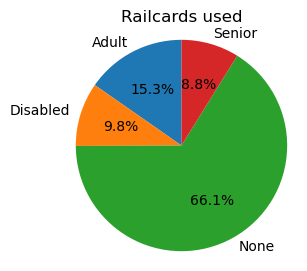

In [72]:
# How many customers use railcards and what type of railcards are used?

v1 = pd.pivot_table(railway,
               index = 'Railcard',
               values = 'Transaction ID',
               aggfunc = 'count'
               )
# extracting values and labels 
values = v1['Transaction ID']
labels = v1.index

# creating a pie chart 
plt.figure(figsize = (3,3))
plt.pie(values, labels = labels, autopct = '%1.1f%%', startangle = 90)

# chart details
plt.title('Railcards used')
plt.axis('equal')
plt.show()

`(ii)`

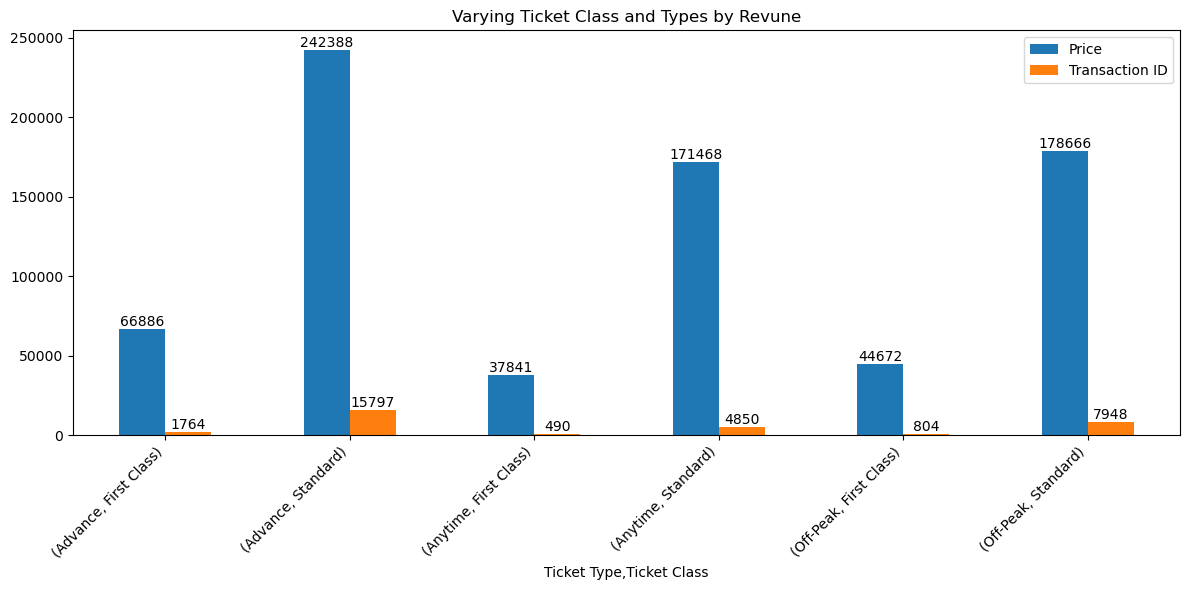

In [74]:
# How does the revenue vary by ticket types and classes.
v2 = pd.pivot_table(railway,
               index = ['Ticket Type', 'Ticket Class'],
               values = ['Transaction ID', 'Price'],
               aggfunc = {'Transaction ID': 'count',
                          'Price': 'sum'
                         },
               margins = True,
               margins_name = 'Total'
              )

v2 = v2.drop('Total')

# creating chart.
v2_1 = v2.plot(kind='bar', figsize=(12, 6))

# adding numbers to chart.
for container in v2_1.containers:
    v2_1.bar_label(container, fmt = '%d') 

# plotting.
#v2.plot(kind='bar', figsize=(12, 6))
plt.title('Varying Ticket Class and Types by Revune')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


`iii`

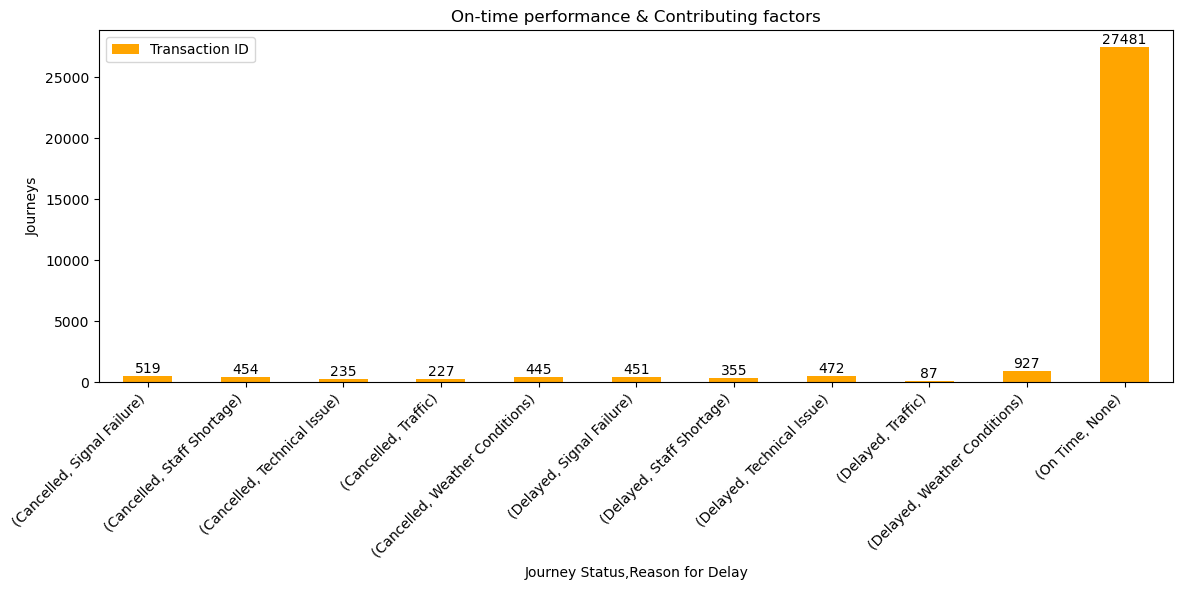

In [76]:
# What is the on-time performance, & What are the main contributing factors?
v3=pd.pivot_table(railway,
               index = ['Journey Status', 'Reason for Delay'],
               values = 'Transaction ID',
               aggfunc = 'count',
               margins = True,
               margins_name = 'Total'
              )

v3 = v3.drop('Total')

# creating chart.
v3_1 = v3.plot(kind = 'bar', figsize=(12,6), color='orange')

# adding numbers to the chart.
for container in v3_1.containers:
    v3_1.bar_label(container, fmt = '%d')

# plotting.
plt.title('On-time performance & Contributing factors')
plt.ylabel('Journeys')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

`iv`

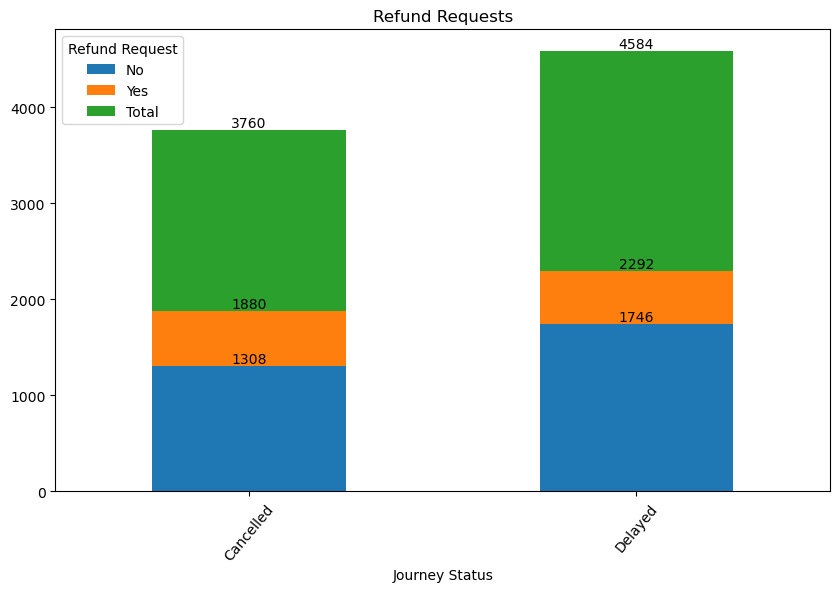

In [78]:
# How did delays impact the refund request?

v4=pd.pivot_table(without_on_time,
               index = 'Journey Status',
               values = 'Transaction ID',
               columns = 'Refund Request',
               aggfunc = 'count',
               margins = True,
               margins_name = 'Total'
              )

v4 = v4.drop('Total')

# creating chart.
v4_1 = v4.plot(kind='bar', stacked=True, figsize=(10, 6))

# adding labels to each segment of the bar.
for container in v4_1.containers:
    v4_1.bar_label(container, fmt='%d')  

# chart details
plt.title('Refund Requests')
plt.xlabel('Journey Status')
plt.xticks(rotation=50)
plt.legend(title='Refund Request')
plt.show()

`v`

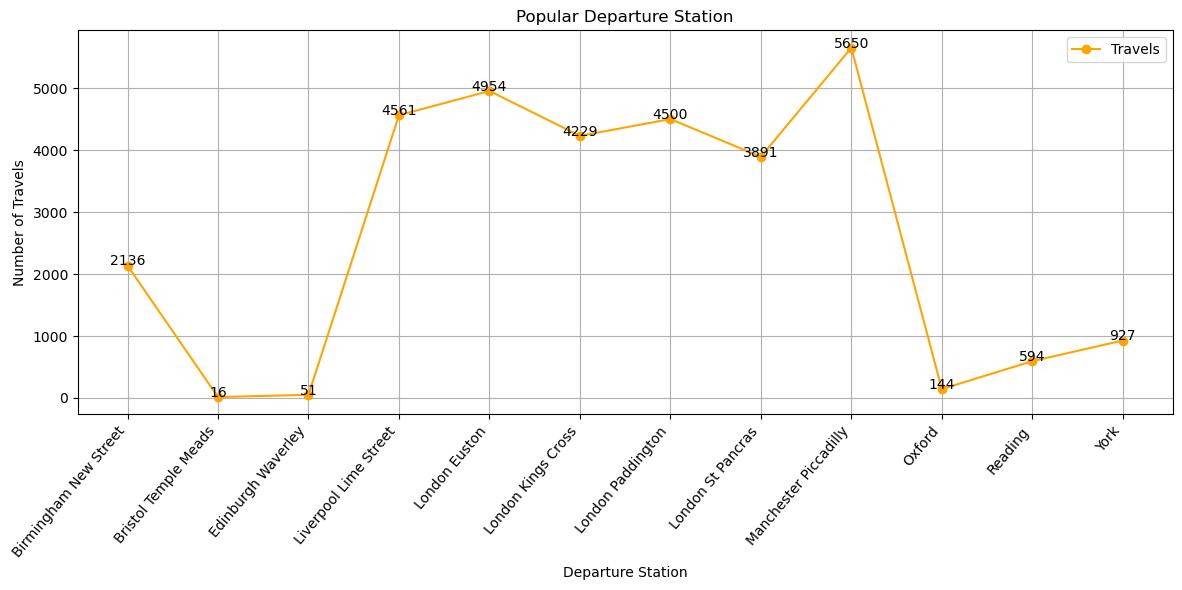

In [80]:
# popular departure stations.
v5=pd.pivot_table(railway,
               index = 'Departure Station',
               values = 'Transaction ID',
               aggfunc = 'count',
               margins = True,
               margins_name = "Total"
              )

v5 = v5.drop('Total')


# creating the line chart.
plt.figure(figsize=(12, 6))
plt.plot(v5.index, v5['Transaction ID'], marker='o', linestyle='-', color='orange', label='Travels')

# adding labels to each segment of the line.
for i, value in enumerate(v5['Transaction ID']):
    plt.text(i, value + 2, f'{value}', ha='center', fontsize=10)

plt.title('Popular Departure Station')
plt.ylabel('Number of Travels')
plt.xlabel('Departure Station')
plt.xticks(rotation=50, ha='right')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

`vi`

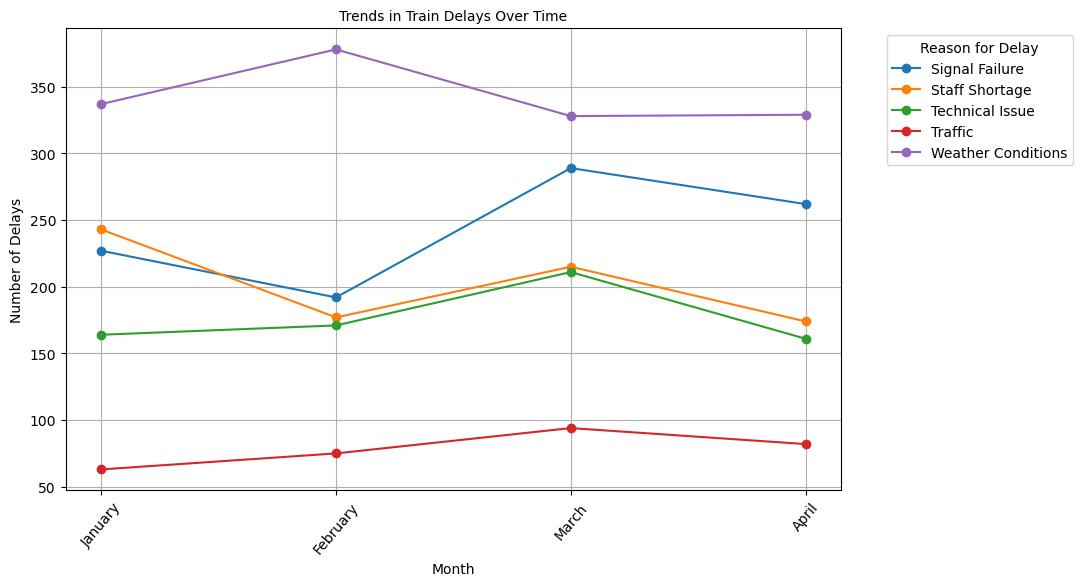

In [82]:
v6 = pd.pivot_table ( no_delay_railway,
                index = 'Reason for Delay',
                values = 'Transaction ID',
                columns = 'Month',
                aggfunc = 'count',
                fill_value = 0,
                margins = True,
                margins_name = 'Total'
               )
v6 = v6.drop('Total')
month_order = ['January', 'February', 'March', 'April']

v6 = v6.reindex(columns=month_order)

# columns are sorted in order
v6 = v6.reindex(columns=month_order)

# plot line chart
plt.figure(figsize=(10, 6))
for reason in v6.index:
    plt.plot(v6.columns, v6.loc[reason], marker='o', label=reason)
     
# chart details
plt.title('Trends in Train Delays Over Time', fontsize = 10)
plt.ylabel('Number of Delays')
plt.xlabel('Month')
plt.xticks(rotation=50)
plt.legend(title='Reason for Delay', bbox_to_anchor=(1.05, 1), loc='upper left')  # Puts legend outside for clarity
plt.grid(True)
plt.show()

`vii`

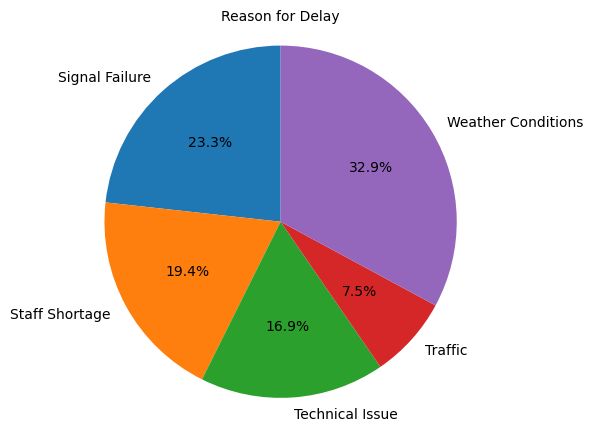

In [84]:
# reasons for delay
v7 = pd.pivot_table(no_delay_railway, 
               index = 'Reason for Delay',
               values = 'Transaction ID',
               aggfunc = 'count'
              )

# extracting values and labels 
values = v7['Transaction ID']
labels = v7.index

# creating the pie chart 
plt.figure(figsize = (5,5))
plt.pie(values, labels = labels, autopct = '%1.1f%%', startangle = 90)

# plotting
plt.title('Reason for Delay', fontsize = 10)
plt.axis('equal')
plt.show()

----

**Conclusion**

**Based on the data and insights derived, we can identify key trends and patterns that inform strategic decisions:**

- Two-thirds **(66.1%)** of travellers do not use a railcard.

- Standard class is the dominant choice, reflecting its **price sensitivity**, while first class has lower demand.

- Anytime tickets are the **least purchased** due to high costs.

- **London stations** collectively dominate travel, while **Manchester Piccadilly** is the busiest single station, and **Bristol Temple Meads** has minimal usage.

- Weather-related delays are the most frequent **(32.9%)**, while traffic has the least impact **(7.5%)**.

- **41-43% of eligible travelers** do not request refunds, possibly due to lack of awareness or complex processes.

---

**Recommendation**

1. **Encourage Railcard Adoption Among Non-Railcard Users.**

To increase the use of railcards, targeted advertising campaigns should be implemented. These should highlight the cost savings passengers can enjoy when using a railcard, especially for frequent travellers such as 9-5 workers.
- **Benefit:** Encouraging railcard usage may lead to an increase in higher-value ticket type and class purchases (e.g. First Class and Anytime tickets), as discounts would make them more accessible.

2. **Improve Customer Satisfaction Through Communication**
- For **Online Purchasers**, sending an automated email reminders to customers who purchase tickets online, informing them of their eligibility for full or partial refunds in the event of delays.
- For **Station Purchasers**, making regular announcements on trains about refund policies and how to claim them.

3. **Reducing Train Delays Through Improved Staffing Coordination**
 
Allowing departure stations to plan ahead could reduce the negative impacts on train on-time performance. For instance, staff shortage, this could be resolved by having the departure station temporarily request staff support from nearby stations during peak hours or anticipated shortages increasing the number of staff. 
This approach can reduce delays, enhance on-time performance, and decrease the number of refund claims, leading to improved customer satisfaction and retained revenue.

In [91]:
railway.to_csv('railway.csv' ,index = False)